# Cargar una segunda fuente de datos dedsde github

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [12]:
url2 = 'https://raw.githubusercontent.com/miguelhurtado2/repositorio_G193_Analisis_E/refs/heads/main/countries.csv'
df = pd.read_csv(url2)
df

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,NaN,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,NaN,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,NaN,NaN,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,NaN,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,NaN,NaN,.af
3,AG,ATG,443.0,St. John's,NaN,XCD,Dollar,NaN,AC,3576396,en-AG,Antigua and Barbuda,NaN,28,+1-268,86754,NaN,NaN,.ag
4,AI,AIA,102.0,The Valley,NaN,XCD,Dollar,NaN,AV,3573511,en-AI,Anguilla,NaN,660,+1-264,13254,NaN,NaN,.ai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,ZA,ZAF,1219912.0,Pretoria,AF,ZAR,Rand,NaN,SF,953987,"zu,xh,af,nso,en-ZA,tn,st,ts,ss,ve,nr",South Africa,"ZW,SZ,MZ,BW,NA,LS",710,27,49000000,####,^(\d{4})$,.za
248,ZM,ZMB,752614.0,Lusaka,AF,ZMW,Kwacha,NaN,ZA,895949,"en-ZM,bem,loz,lun,lue,ny,toi",Zambia,"ZW,TZ,MZ,CD,NA,MW,AO",894,260,13460305,#####,^(\d{5})$,.zm
249,ZW,ZWE,390580.0,Harare,AF,ZWL,Dollar,NaN,ZI,878675,"en-ZW,sn,nr,nd",Zimbabwe,"ZA,MZ,BW,ZM",716,263,13061000,NaN,NaN,.zw
250,CS,SCG,102350.0,Belgrade,EU,RSD,Dinar,NaN,YI,8505033,"cu,hu,sq,sr",Serbia and Montenegro,"AL,HU,MK,RO,HR,BA,BG",891,381,10829175,#####,^(\d{5})$,.cs


In [2]:
url ='https://raw.githubusercontent.com/miguelhurtado2/repositorio_G193_Analisis_E/refs/heads/main/countries2.csv'
df_pob = pd.read_csv(url, sep = ",")
df_pob.head()

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


Aqui vemos la población año tras año de Colombia

In [3]:
df_pob_co = df_pob[df_pob["country"] == "Colombia"]
df_pob_co

,country,year,population
300,Colombia,1952,12350771
301,Colombia,1957,14485993
302,Colombia,1962,17009885
303,Colombia,1967,19764027
304,Colombia,1972,22542890
305,Colombia,1977,25094412
306,Colombia,1982,27764644
307,Colombia,1987,30964245
308,Colombia,1992,34202721
309,Colombia,1997,37657830


In [4]:
df_pob_co.shape

(12, 3)

#  Visualicemos datos

<Axes: >

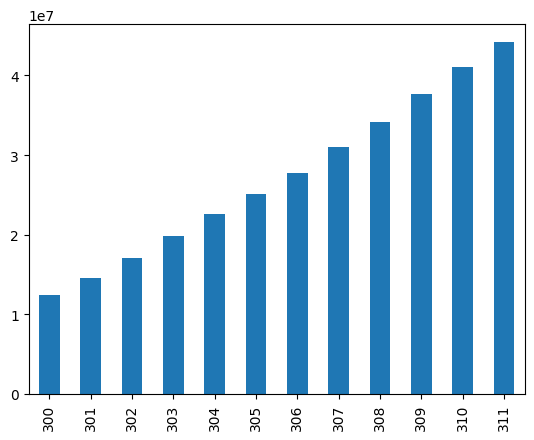

In [5]:
df_pob_co.drop(["country"], axis = 1)["population"].plot(kind="bar")

In [6]:
df_pob_ar = df_pob[df_pob["country"]=="Argentina"]
df_pob_ar

,country,year,population
48,Argentina,1952,17876956
49,Argentina,1957,19610538
50,Argentina,1962,21283783
51,Argentina,1967,22934225
52,Argentina,1972,24779799
53,Argentina,1977,26983828
54,Argentina,1982,29341374
55,Argentina,1987,31620918
56,Argentina,1992,33958947
57,Argentina,1997,36203463


<Axes: xlabel='year'>

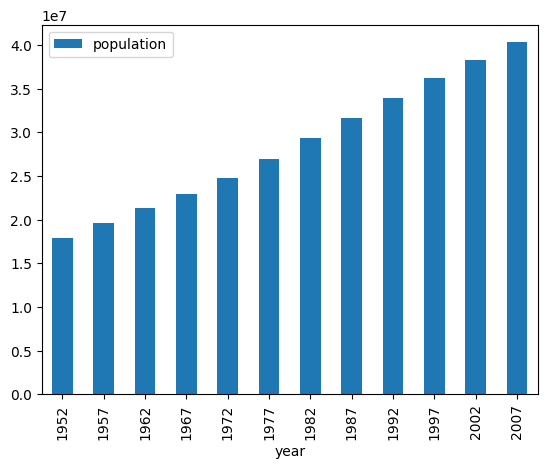

In [7]:
df_pob_ar.set_index("year").plot(kind="bar")

<Axes: xlabel='year'>

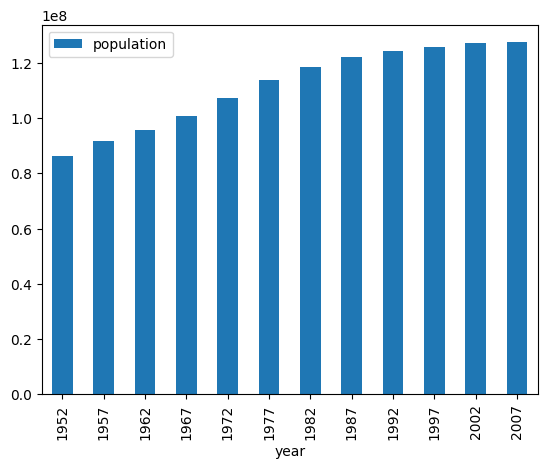

In [8]:
df_pob_jap = df_pob[df_pob["country"]=="Japan"]
df_pob_jap.set_index("year").plot(kind ="bar")

# Comparativa entre 2 Países

<Axes: >

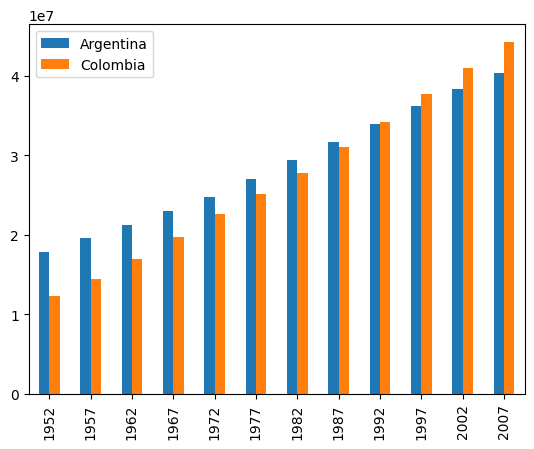

In [9]:
años = df_pob_co["year"].unique()
pob_ar = df_pob_ar["population"].values
pob_co = df_pob_co["population"].values

datos_plot = pd.DataFrame({"Argentina":pob_ar,"Colombia":pob_co}, index = años)
datos_plot.plot(kind = "bar")

# Filtremos paises hispano - hablantes

In [14]:
df_esp = df.replace(np.nan, "", regex=True)
df_esp = df_esp[df_esp["languages"].str.contains("es")]
df_esp

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
9,AR,ARG,2766890.0,Buenos Aires,SA,ARS,Peso,,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,"CL,BO,UY,PY,BR",32,54,41343201,@####@@@,"^[A-Z]?\d{4}[A-Z]{0,3}$",.ar
13,AW,ABW,193.0,Oranjestad,,AWG,Guilder,,AA,3577279,"nl-AW,es,en",Aruba,,533,297,71566,,,.aw
28,BO,BOL,1098580.0,Sucre,SA,BOB,Boliviano,,BL,3923057,"es-BO,qu,ay",Bolivia,"PE,CL,PY,BR,AR",68,591,9947418,,,.bo
30,BR,BRA,8511965.0,Brasilia,SA,BRL,Real,,BR,3469034,"pt-BR,es,en,fr",Brazil,"SR,PE,BO,UY,GY,PY,GF,VE,CO,AR",76,55,201103330,#####-###,^\d{5}-\d{3}$,.br
36,BZ,BLZ,22966.0,Belmopan,,BZD,Dollar,,BH,3582678,"en-BZ,es",Belize,"GT,MX",84,501,314522,,,.bz
45,CL,CHL,756950.0,Santiago,SA,CLP,Peso,,CI,3895114,es-CL,Chile,"PE,BO,AR",152,56,16746491,#######,^(\d{7})$,.cl
48,CO,COL,1138910.0,Bogota,SA,COP,Peso,,CO,3686110,es-CO,Colombia,"EC,PE,PA,BR,VE",170,57,47790000,,,.co
49,CR,CRI,51100.0,San Jose,,CRC,Colon,,CS,3624060,"es-CR,en",Costa Rica,"PA,NI",188,506,4516220,####,^(\d{4})$,.cr
50,CU,CUB,110860.0,Havana,,CUP,Peso,,CU,3562981,es-CU,Cuba,US,192,53,11423000,CP #####,^(?:CP)*(\d{5})$,.cu
60,DO,DOM,48730.0,Santo Domingo,,DOP,Peso,,DR,3508796,es-DO,Dominican Republic,HT,214,+1-809 and 1-829,9823821,#####,^(\d{5})$,.do


In [15]:
df_esp.shape

(29, 19)

# Visualicemos por población

<Axes: xlabel='alpha_3'>

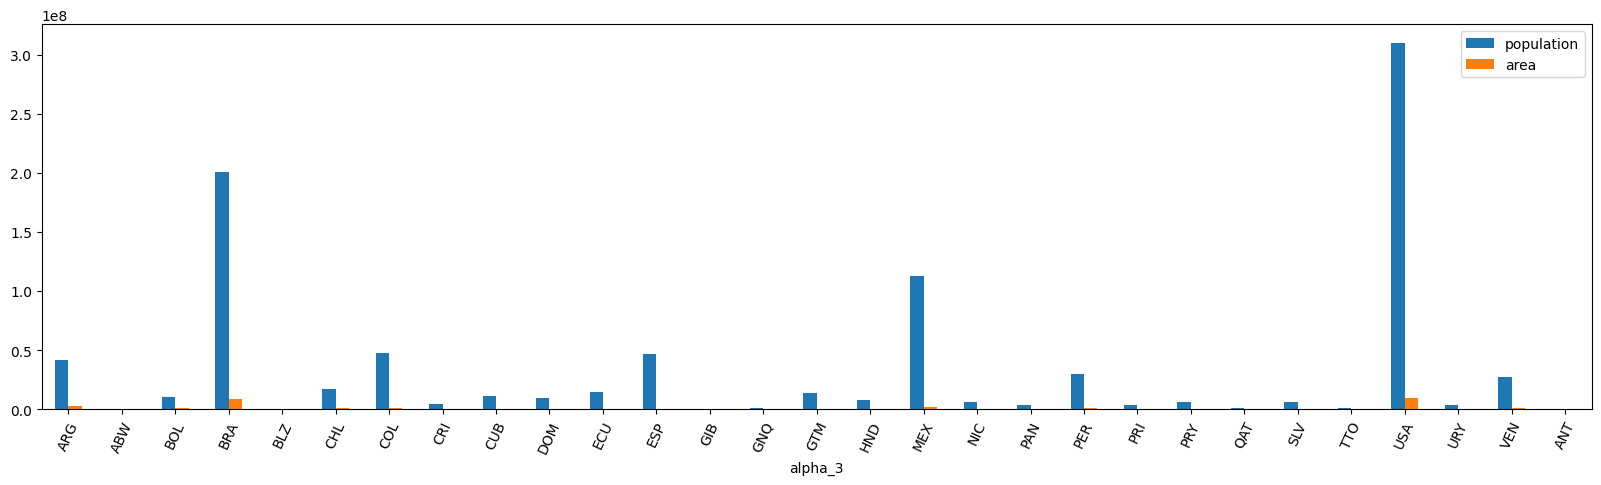

In [17]:
df_esp.set_index("alpha_3")[["population","area"]].plot(kind="bar", rot= 65 , figsize = (20,5))

# Detección de Outliers

In [24]:

# Creamos una función que, encuentra los atipicos o outliers

def buscar_anomalias(dataframe):
  anomalias = []
  df_std = dataframe.std()
  df_mean = dataframe.mean()
  corteAnomalo = df_std * 2
  limite_menor = df_mean - corteAnomalo
  limite_mayor = df_mean + corteAnomalo
  print(limite_menor.iloc[0])
  print(limite_mayor.iloc[0])

  # Generacipon de las anomalias
  for index, row in dataframe.iterrows():
    outlier= row # Obtener columna   Fila: columna 1 | columna 2 | columna 3
    if (outlier.iloc[0]>limite_mayor.iloc[0]) or (outlier.iloc[0]<limite_menor.iloc[0]):
      anomalias.append(index)
  return anomalias

In [19]:
df_esp.set_index("alpha_3")[["population"]]

,population
alpha_3,
ARG,41343201
ABW,71566
BOL,9947418
BRA,201103330
BLZ,314522
CHL,16746491
COL,47790000
CRI,4516220
CUB,11423000


In [27]:
anomalias = buscar_anomalias(df_esp.set_index("alpha_3")[["population"]])
print(anomalias)

-102872707.87855022
167589161.25786057
['BRA', 'USA', 'BRA', 'USA']


In [26]:
indices_anomalies = df_esp[df_esp["alpha_3"].isin(anomalias)].index.tolist()
indices_anomalies

[30, 233]

In [28]:
# Quitar BRA y USA por ser considerados atipicos y volvemos a gráficar

df_esp.drop([30,233], inplace = True)

<Axes: xlabel='alpha_3'>

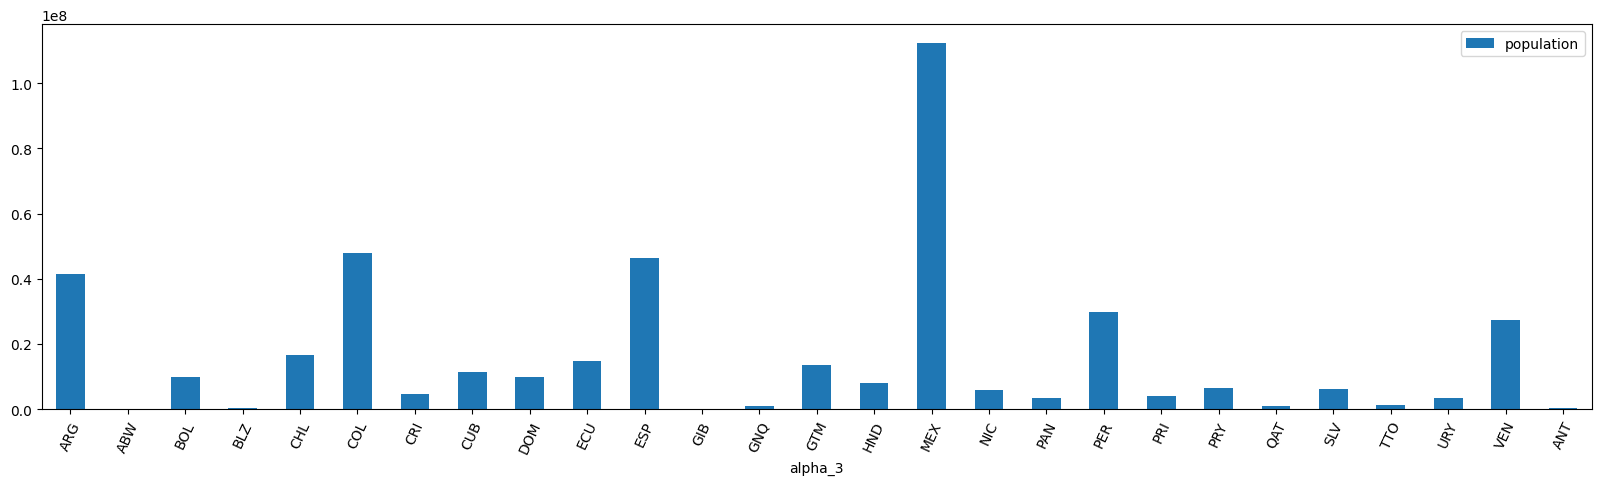

In [29]:
df_esp.set_index("alpha_3")[["population"]].plot(kind="bar", rot=  65, figsize=(20,5))

# Graficamos ornando por tamaño de población

<Axes: xlabel='alpha_3'>

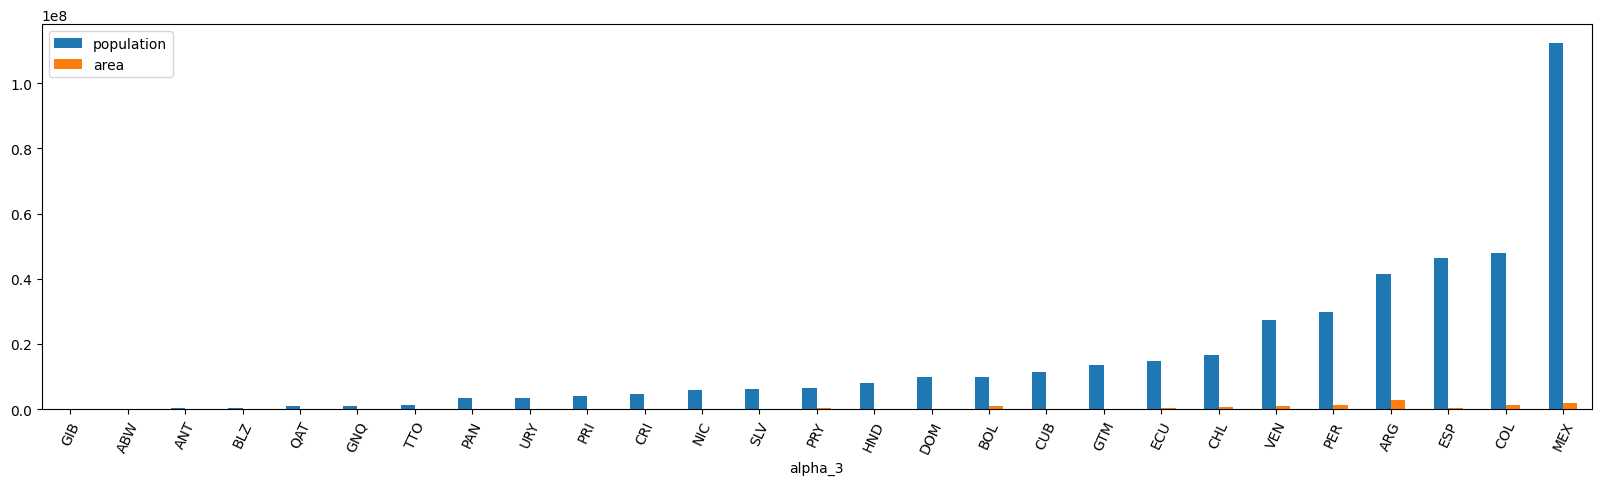

In [30]:
df_esp.set_index("alpha_3")[["population", "area"]].sort_values(["population"]).plot(kind="bar", rot=65, figsize=(20,5))